# FML - Winter Semester 2022


# Bonus Points Assignment 1

<div style="text-align: right;font-size: 0.8em">Document Version 1.0.0</div>
For detailed task instructions, please refer to the assignment PDF.

This assignment requires `numpy`, `matplotlib`, `scikit-learn`, and `scipy` to run. If one of these imports fails, please install the corresponding library and make sure that you have activated the corresponding virtual environment. If the problem persists, please seek help on the forums or use [the JupyterHub profile of the lecture](https://jupyter.rwth-aachen.de/hub/spawn).


In [1]:
from pathlib import Path
from numpy import math
import numpy as np
np.random.seed(1234)
ROOT = Path().resolve()
DATA = ROOT / 'data'  # This contains the path to the data/ folder of the assignment


### Setup

**Question 1.1** Load the data into the following numpy arrays. For the output, only use the first torque variable.
Randomly split the data from the file `sarcos_inv.mat` into a training set (80%) and a validation set (20%).


In [2]:
from scipy.io import loadmat  # Use scipy.io to import the data

# First, load the data sets as numpy arrays
# Then, split it appropriately in the following variables
training = loadmat('data\sarcos_inv.mat')
test = loadmat('data\sarcos_inv_test.mat')

a = training['sarcos_inv']
split = 0.8
N = len(a)
sample = int(split*N)
np.random.shuffle(a)

#x_data = a[:,:21]
#y_data = a[:,21:]

# Input and output training data
xs_train = a[:sample, :21]
ys_train = a[:sample, 21:22]

# Input and output validation data
xs_valid = a[sample:, :21]
ys_valid = a[sample:, 21:22]

# Input and output test data
b = test['sarcos_inv_test']
xs_test = b[:, 0:21]
ys_test = b[:, 21:22]

# YOUR CODE HERE


Use the following checks to make sure that your data has the right shapes.


In [3]:
assert xs_train.shape == (
    35587, 21), "xs_train should contain 35587 21-dimensional data points"
assert ys_train.shape == (
    35587, 1), "ys_train should contain 35587 1-dimensional data points"
assert xs_valid.shape == (
    8897, 21), "xs_valid should contain 8897 21-dimensional data points"
assert ys_valid.shape == (
    8897, 1), "ys_valid should contain 8897 1-dimensional data points"
assert xs_test.shape == (
    4449, 21), "xs_test should contain 4449 21-dimensional data points"
assert ys_test.shape == (
    4449, 1), "ys_test should contain 4449 1-dimensional data points"


In [4]:
# Used for grading. Do not change.


**Question 1.2** Implement `my_variance` and `my_mse`.


In [5]:
def my_variance(xs: np.ndarray) -> np.ndarray:
    """ Computes the sample variance of a given vector of scalars

    Args:
        xs: 1D numpy array containing scalars

    Returns:
        The empirical variance of the provided vector as a float
    """
    # YOUR CODE HERE
    #var = np.var(xs,axis=0)
    var = np.mean(xs**2) - ((np.mean(xs)**2))

    return var


Use the following checks to make sure that your function gives the correct sample variance in simple cases.


In [6]:
assert np.isclose(my_variance(
    np.array([1, 1, 1])), 0), "Variance of this vector should be 0"
assert np.isclose(my_variance(
    np.array([1, 2, 3, 4, 5])), 2), "Variance of this vector should be 2"


In [7]:
# Used for grading. Do not change.


In [8]:
# Used for grading. Do not change.


Now, implement the MSE function.


In [9]:
def my_mse(z1: np.ndarray, z2: np.ndarray):
    """ Computes the Mean Squared Error (MSE)

    Args:
        z1: A 1D numpy array (usually the predictions).
        z2: Another 1D numpy array.

    Returns
        The MSE of the given data.
    """
    # YOUR CODE HERE
    mse = (np.square(z1-z2)).mean(axis=0)
    return mse


Use the following checks to make sure that your function gives the correct MSE in simple cases.


In [10]:
assert np.isclose(my_mse(np.array([3.0]), np.array(
    [4.0])), 1), "The MSE between 3 and 4 should be 1"
assert np.isclose(my_mse(np.array([1, 2, 3, 4]), np.array(
    [1, 2, 3, 4])), 0), "MSE should be 0 for identical z vectors"


In [11]:
# Used for grading. Do not change.


**Question 1.3** Standardize the dataset you loaded earlier.


In [12]:
def standardizer(data):
    mean = np.mean(data, axis=0)
    std_deviation = np.std(data, axis=0)
    standardized = (data-mean)/std_deviation
    return standardized


xs_train_std = standardizer(xs_train)
ys_train_std = (ys_train - np.mean(ys_train))
xs_valid_std = standardizer(xs_valid)
ys_valid_std = (ys_valid - np.mean(ys_train))
xs_test_std = standardizer(xs_test)
ys_test_std = (ys_test - np.mean(ys_train))
# # YOUR CODE HERE


Use the following checks to make sure that your standardization does not change the data shapes.


In [13]:
assert xs_train_std.shape == xs_train.shape, "Normalizing is not supposed to change the shape of your data"
assert ys_train_std.shape == ys_train.shape, "Normalizing is not supposed to change the shape of your data"
assert xs_valid_std.shape == xs_valid.shape, "Normalizing is not supposed to change the shape of your data"
assert ys_valid_std.shape == ys_valid.shape, "Normalizing is not supposed to change the shape of your data"
assert xs_test_std.shape == xs_test.shape, "Normalizing is not supposed to change the shape of your data"
assert ys_test_std.shape == ys_test.shape, "Normalizing is not supposed to change the shape of your data"


Use the following checks to make sure that the training data has roughly mean 0 and variance 1 after standardizing.


In [14]:
assert np.isclose(np.mean(xs_train_std), 0,
                  atol=0.005), "Training inputs mean should be 0"
assert np.isclose(np.mean(ys_train_std), 0,
                  atol=0.005), "Training outputs mean should be 0"

assert np.allclose(np.var(xs_train_std, axis=0), 1,
                   atol=0.005), "Training inputs variance should be 1"


In [15]:
# Used for grading. Do not change.


In [16]:
# Used for grading. Do not change.


In [17]:
# Used for grading. Do not change.


In [18]:
# Used for grading. Do not change.


## Linear regression

### Simple linear regression

**Question 1.4** Implement a function that performs linear regression given input data and target values.


In [19]:
def my_linear_regression(phi: np.ndarray, ys: np.ndarray) -> np.ndarray:
    """ Computes the weights of a linear regression that fits the given data.

    Notes:
        You may use np.linalg.solve to solve a system of linear equations.

    Args:
        phi: Input feature matrix of shape (N, D) containing N samples of dimension D.
        ys: Target outputs of shape (N, 1) containing N 1-dimensional samples.

    Returns:
        A numpy array containing the regressed weights of shape (D, 1), containing one weight for each input dimension.
    """
    # YOUR CODE HERE
    weights = np.matmul(np.matmul(np.linalg.inv(
        np.matmul(phi.transpose(), phi)), phi.transpose()), ys)
    return weights


Use the following checks to make sure your weights have the correct shape.


In [20]:
_my_weights = my_linear_regression(xs_train_std, ys_train_std)
assert _my_weights.shape == (21, 1), "Weights should have shape (D, 1)."


If you implemented everything correctly so far, you should now get an MSE of roughly $31$. If your actual MSE deviates a lot from that, try to debug the code that you have written so far. Here you just have to run the cell below.


In [21]:
_my_y_valid_pred = xs_valid_std @ _my_weights
_my_mse = my_mse(ys_valid_std, _my_y_valid_pred)
print(f"Your MSE should be roughly 31 and it is {_my_mse}.")


Your MSE should be roughly 31 and it is [31.60066315].


In [22]:
# Used for grading. Do not change.


### Linear regression with polynomial features

**Question 1.5** Implement a function that computes non-repeating features of degree up to two.


In [23]:
def my_quadratic_features(xs: np.ndarray) -> np.ndarray:
    """ Generates polynomial features up to degree 2 from given data.

    The quadratic features should include monomials (i.e., x_i, x_i**2 etc)
    and interaction terms (x_1*x_2 etc), but no repetitions (i.e. NOT both x_1*x_2 and x_2*x_1).
    You should include a bias term.
    The order of the samples should not be changed through the transformation.

    Args:
        xs: A 2D numpy array of shape (N, D) containing N samples of dimension D.

    Returns:
        An (N, M) numpy array containing the transformed input.
    """
    # YOUR CODE HERE
    output = []
    for rows in range(len(xs)):
        list_temp = np.append(1, xs[rows])
        xs_temp = np.array([list_temp])
        xs_temp2 = xs_temp
        for i in xs_temp:
            for j in i:
                multiply = xs_temp*xs_temp2
                xs_temp = np.delete(xs_temp, 0)
                xs_temp2 = np.delete(xs_temp2, -1)
                output = np.append(output, multiply)
    result = np.array([output])
    degree = 2
    number_of_variables = len(xs[0])
    max_features = int((math.factorial(number_of_variables+degree-1)
                        )/(math.factorial(number_of_variables-1)))
    return result.reshape((len(xs), max_features))


Use the following checks to make sure that your function produces the correct number of features in simple cases.


In [24]:
assert my_quadratic_features(np.array([[0, 1]])).shape == (
    1, 6), "For 2D data, your function should produce 6D quadratic features."
assert my_quadratic_features(np.array([[0, 1], [2, 3]])).shape == (
    2, 6), "Your function should produce 6D quadratic features for every data point."


Use the following checks to make sure that your function produces the correct features in simple cases.


In [25]:
_01_quadratic_features = my_quadratic_features(np.array([[0, 1]]))
assert {0, 1} == set(
    *_01_quadratic_features), "Quadratic features of [0, 1] should include only 0s and 1s."
_count_0 = np.count_nonzero(_01_quadratic_features == 0)
_count_1 = np.count_nonzero(_01_quadratic_features == 1)
assert _count_0 == 3, "Quadratic features of [0, 1] should include 3 zeros (x_0, x_0**2, x_0*x_1)"
assert _count_1 == 3, "Quadratic features of [0, 1] should include 3 ones (bias, x_1, x_1 ** 2)"

assert {1, 4, 5, 16, 20, 25} == set(*my_quadratic_features(np.array(
    [[4, 5]]))), "Quadratic features of [4, 5] should be any permutation of [1, 4, 5, 16, 20, 25]."


In [26]:
# Used for grading. Do not change.


**Ungraded question 1.6** Can you come up with a function for polynomial, non-repeating polynomial features for arbitrary degrees?


We can probably perform a form of convolution algorithm, but instead of adding the products, we just append them to our output array.


**Question 1.7** Generate polynomial features of up to degree 3 from your standardized train and test data.


In [27]:
from sklearn.preprocessing import PolynomialFeatures
# YOUR CODE HERE
poly = PolynomialFeatures(degree=3)
xs_train_polynomial = poly.fit_transform(xs_train_std)
xs_valid_polynomial = poly.fit_transform(xs_valid_std)


Use the following checks to make sure that the resulting polynomial features have the right shape.


In [28]:
assert xs_train_polynomial.shape == (35587, 2024)
assert xs_valid_polynomial.shape == (8897, 2024)


In [29]:
# Used for grading. Do not change.


Now run linear regression with polynomial features to obtain the optimal weights.


In [30]:
_my_weights = my_linear_regression(xs_train_polynomial, ys_train_std)
assert _my_weights.shape == (2024, 1), "Weights should have shape (D, 1)."


Evaluate your model on the validation data. If you implemented everything correctly so far, you should now get an MSE of roughly $6.8$. Here you just have to run the cell below.


In [31]:
_my_y_valid_pred = xs_valid_polynomial @ _my_weights
_my_mse = my_mse(ys_valid_std, _my_y_valid_pred)
print(f"Your MSE should be roughly 6.8 and it is {_my_mse}.")


Your MSE should be roughly 6.8 and it is [7.04585158].


You can check whether your model does not overfit by comparing the training and validation MSEs; they should have similar values for a model that does not overfit. Here you just have to run the cell below.


In [32]:
_my_y_train_pred = xs_train_polynomial @ _my_weights
_my_train_mse = my_mse(ys_train_std, _my_y_train_pred)
print(f"Your training MSE is {_my_train_mse}. Does your model overfit?")


Your training MSE is [5.87115327]. Does your model overfit?


## Clustering

**Question 2.1** Implement the basic $K$-Means algorithm.


In [33]:
def my_kmeans(xs: np.ndarray, init_centers: np.ndarray, n_iter: int):
    """ Runs the K-Means algorithm from a given initialization

    Args:
        xs: A 2D numpy array of shape (N, D) containing N samples of dimension D
        init_centers: A 2D numpy array of shape (K, D) containing the K initial cluster centers of dimension D.
        n_iter: The number of iterations for the K-Means algorithm.

    Returns:
        A (K, D) numpy array containing the final cluster centers.
    """

    # YOUR CODE HERE
    def kmeans_in_numpy(xs, init_centers):
        no_of_clusters = len(init_centers)
        tot_data = len(xs)
        one_of_k = np.zeros([no_of_clusters])

        # setting up r
        final_r = []
        for n in range(tot_data):
            individual_r = np.zeros([no_of_clusters])
            temp_r = np.array([])

            for k in range(no_of_clusters):
                # data1 - cluster1, data1 - cluster2, data2 - cluster1
                euclidean_dist = np.linalg.norm(xs[n]-init_centers[k])
                temp_r = np.append(temp_r, euclidean_dist)

            position = np.argmin(temp_r)
            # we know which cluster is the closest to the current data point
            individual_r[position] = 1
            final_r.append(individual_r.tolist())

        # Setting up Denominator of finding new cluster center
        points_per_cluster = np.array([])
        for k in range(len(final_r[0])):
            temp1 = np.sum(final_r, axis=k)[0]
            points_per_cluster = np.append(points_per_cluster, temp1)

        # Finding new cluster center
        final_cluster = np.array([])
        for k2 in range(len(points_per_cluster)):
            new_cluster = np.zeros(len(xs[0]))
            for n2 in range(tot_data):
                temp2 = ((xs[n2])*(final_r[n2][k2])/points_per_cluster[k2])
                new_cluster = np.array(new_cluster+temp2)
            final_cluster = np.append(final_cluster, new_cluster)

        final_cluster = np.array([final_cluster]).reshape(
            np.shape(init_centers)[0], np.shape(init_centers)[1])
        return final_cluster

    for i in range(n_iter):
        if i == 0:
            continue
        else:
            init_centers = kmeans_in_numpy(xs, init_centers)
    return init_centers


Use the following checks to make sure your algorithm produces centers of the correct shape and gives the correct result in the simplest case of 0 iterations.


In [34]:
assert my_kmeans(
    np.array([[0.92222276, 0.65417794, 0.81171083], [0.32436396, 0.43398054, 0.06203346], [
             0.66190191, 0.51464817, 0.53506438], [0.52361743, 0.82799732, 0.99989914]]),
    np.array([[0.46606325, 0.30170084, 0.3454716],
             [0.09386854, 0.6876939, 0.89328422]]),
    3
).shape == (2, 3), "Final cluster centers must have the same shape as the initial cluster centers"
assert np.allclose(my_kmeans(np.random.rand(10, 4), __initial_centers := np.random.rand(
    3, 4), 0), __initial_centers), "For 0 iterations, the final cluster centers must be identical to the initial cluster centers"


In [35]:
# Used for grading. Do not change.


**Question 2.2** Generate random data from four gaussian distributions.


In [36]:
# YOUR CODE HERE

mean = np.array([
    [-2, 2],
    [-2, -2],
    [2, -2],
    [2, 2]])

i = np.identity(2)

cov = np.array([0.2*i, 0.2*i, 0.5*i, 0.5*i])


probabilities = np.array([0.3, 0.2, 0.4, 0.1])


def generate_data(no_data, mean, cov, prob):
    clusters, features = mean.shape
    data = np.zeros((no_data, features))
    for i in range(no_data):
        k = np.random.choice(clusters, size=1, p=prob)[0]
        x = np.random.multivariate_normal(mean[k], cov[k])
        data[i] = x
    return data


np.random.seed(12345659)
xs_cluster_test = generate_data(100, mean, cov, probabilities)

# plt.scatter(x=xs_cluster_test[:, 0], y=xs_cluster_test[:, 1], marker='x')
# plt.tight_layout()


Use the following check to make sure your data has the correct shape.


In [37]:
assert xs_cluster_test.shape == (100, 2), "You should get 100 2D data points"


**Question 2.3** Run your $K$-Means algorithm on the test data for $K=2,3,4,5$ clusters and plot the final cluster centers.


In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus

def my_plot(xs: np.ndarray):
    """ Plots the K-Means result for different numbers of cluster given 2-dimensional data.
    
    Notes:
        Use the `kmeans_plusplus` function to get initial cluster centers.
    
    Args:
        xs: A 2D numpy array of shape (N, 2) containing N 2-dimensional samples.
    """
    
    plt.figure(figsize=(10, 10))
    n_clusters = [2, 3, 4, 5]  # different numbers of clusters
    
    # iterate over each cluster n in `n_clusters` with index i
    for i, n in enumerate(n_clusters):
        centers,indices=kmeans_plusplus(xs,n,random_state=0)
        plt.subplot(2, 2, i + 1)
        plt.scatter(centers[:,0],centers[:,1],color='r')
        plt.plot(xs_cluster_test[:, 0], xs_cluster_test[:, 1], '.')
        # YOUR CODE HERE
    

Plot the data and the centers you get using your randomly generated data. You should get a result that looks conceptually similar to the plots that you find in the assignment PDF. Here you just have to run the cell below.


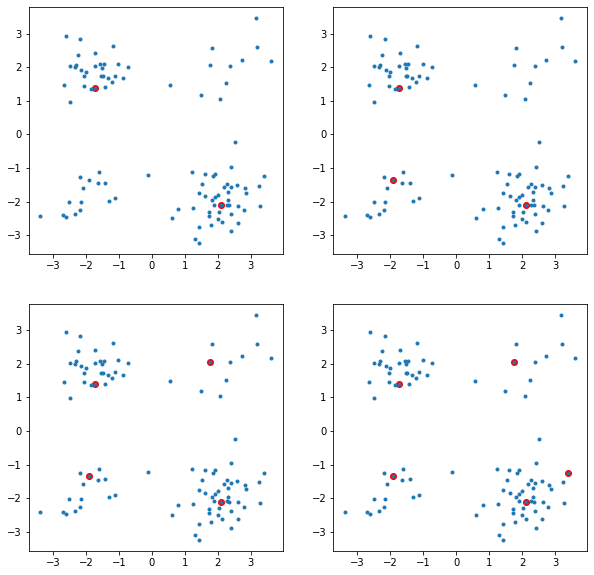

In [39]:
my_plot(xs_cluster_test)


## Radial Basis Functions Network

**Question 3.1** Find $K=100$ cluster centers using $K$-Means.


In [40]:
from sklearn.cluster import KMeans


def find_centers(xs: np.ndarray, n_clusters: int = 100) -> np.ndarray:
    """ Computes KMeans cluster centers for the given data.

    Even though we will use this function to compute centers for our 21-dimensional data points,
    this function should work for arbitrary dimensions.

    Notes:
        Use the predefined KMeans algorithm provided by sklearn.

    Args:
        xs: A 2D numpy array of shape (N, D) containing N D-dimensional samples.
        n_clusters: Number of clusters to use.

    Returns:
        n_clusters D-dimensional cluster centers as a numpy array of shape (n_clusters, D).
    """

    # YOUR CODE HERE
    # kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(xs)
    # return kmeans.cluster_centers_

    kmeans=KMeans(n_clusters=n_clusters,init='k-means++').fit(xs)
    return kmeans.cluster_centers_



Use the following check to make sure you get the correct number of centers with the correct dimensionality.


**Question 3.2** Implement the element-wise Gaussian radial function.


In [41]:
# This 100x21 numpy array should contain the cluster centers

xs_centers = find_centers(xs_train_std)
assert xs_centers.shape == (
    100, 21), "You should get 100 clusters around 21-dimensional centers."


In [42]:
def my_gaussian(r: np.ndarray, sigma: float) -> np.ndarray:
    """ Gaussian probability density function.

    The function is applied element-wise.

    Args:
        r: A numpy array of arbitrary shape to apply the gaussian to (element-wise).
        sigma: Variance used for normalization.

    Returns:
        A numpy array of the same shape as the input r to which the gaussian was applied.
    """
    # YOUR CODE HERE
    term1 = 1/(np.sqrt(2*np.pi*(sigma**2)))
    term2 = np.exp(-(r**2)/(2*(sigma**2)))
    result = term1*term2
    return result


Use the following check to make sure you apply the gaussian element-wise to the input data.


In [43]:
_test_data = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]])
assert my_gaussian(_test_data, 1).shape == (
    2, 5), "The Gaussian should not change the shape of the data you apply it to as it must be applied element-wise."


In [44]:
# Used for grading. Do not change.


**Question 3.3** Implement the function `compute_rbf_features`, which takes as input the standardized data, cluster centers, and scale $\sigma$ and outputs the feature matrix (with a bias term).


In [45]:
def compute_rbf_features(xs: np.ndarray, centers: np.ndarray, sigma: float) -> np.ndarray:
    """ Computes the feature matrix for the data xs with the given cluster centers and scale.

    For the distance, use the euclidean norm.
    Your transformation should not change the order of data points or centers.

    Notes:
        You may use np.linalg.norm(x) to get the norm of a vector or matrix x.
        To get the norm along a specified axis a, use np.linalg.norm(x, axis=a)

    Args:
        xs: 2D numpy array of shape (N, D) containing N D-dimensional data points.
        centers: 2D numpy array of shape (K, D) containing K D-dimensional centers.
        sigma: Variance used for normalization.

    Returns:
        A 2D numpy array of shape (N, K) containing the transformations for each pair of data points and cluster centers.
    """
    # YOUR CODE HERE
    result_distance = np.array([])
    result_gaussian=[]

    def dist(xs,centers):
        return np.linalg.norm(xs-centers)
    for i in range(len(xs)):
        RBF_array=[]
        RBF_array.insert(0,1)
        for j in range(len(centers)):
            result_distance=dist(xs[i],centers[j])
            RBF_temp = my_gaussian(result_distance, sigma)
            RBF_array.append(RBF_temp)
        result_gaussian.append(RBF_array)
    
    return np.array(result_gaussian,dtype=np.float64)

Use the following checks to make sure your transformation produces the correct result in simple cases.


In [46]:
_test_data = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]])
_test_centers_1 = np.array([[0, 0, 0, 0, 0.]])
_test_centers_2 = np.array([[0, 0, 0, 0, 0.], [5, 5, 5, 5, 5.]])
_message = "Your transformation should output an array of shape (N, M+1), where N is the number of points and M is the number of cluster centers."
assert compute_rbf_features(
    _test_data, _test_centers_1, 1).shape == (2, 2), _message
assert compute_rbf_features(
    _test_data, _test_centers_2, 1).shape == (2, 3), _message

_features_far_data = compute_rbf_features(
    np.array([[0, 0, 0]]), np.array([[100, 200, 300]]), 1)
_expected_output = np.array([1., 0.])
assert np.allclose(_features_far_data, _expected_output) or np.allclose(
    _features_far_data[::-1], _expected_output), "For a data point this far from the center, the transformation should be roughly [1., 0.]"


In [47]:
# Used for grading. Do not change.


In [48]:
# Used for grading. Do not change.


**Question 3.4** Run simple linear regression on the transformed data and evaluate it on both the training and validation sets.


In [49]:
xs_train_gauss = compute_rbf_features(xs_train_std, xs_centers, 25)
_my_weights = my_linear_regression(xs_train_gauss, ys_train_std)

ys_train_pred = xs_train_gauss@_my_weights
xs_valid_gauss = compute_rbf_features(xs_valid_std, xs_centers, 25)
ys_valid_pred = xs_valid_gauss@_my_weights
# YOUR CODE HERE


If you implemented everything correctly so far, you should now get an MSE of roughly $18.3$. You can check this by running the cell below.


In [50]:
_mse = my_mse(ys_valid_std, ys_valid_pred)
print(f"Your validation MSE should be roughly 18.3 and it is {_mse}")


Your validation MSE should be roughly 18.3 and it is [19.30412112]


You can check that your model does not overfit by comparing the training and validation MSEs; they should have similar values for a model that does not overfit. Here you just have to run the cell below.


In [51]:
_my_train_mse = my_mse(ys_train_std, ys_train_pred)
print(f"Your training MSE is {_my_train_mse}. Does your model overfit?")


Your training MSE is [18.42033726]. Does your model overfit?


**Ungraded question 3.5** Can you improve the performance of the RBF network?


**Question 3.6** Evaluate your final model on the test data


In [52]:
# This should contain the predictions on the test data set

xs_test_gauss = compute_rbf_features(xs_test_std, xs_centers, 25)
ys_pred_test = xs_test_gauss@_my_weights

# This should contain the resulting MSE on the test data
mse_test = my_mse(ys_pred_test, ys_test_std)
# YOUR CODE HERE

print(f"Your model achieved an MSE of {mse_test} on the test set.")


Your model achieved an MSE of [18.02739868] on the test set.


Use the following check to make sure your predictions have the correct shape.


In [53]:
assert ys_pred_test.shape == ys_test_std.shape
